In [32]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic (1).csv


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Statistical Plotting

In [46]:
a = pd.read_csv('titanic.csv')
print(a.head(10))


   PassengerId  Survived  Pclass     Sex   Age     Fare
0            1         0       3    male  22.0   7.2500
1            2         1       1  female  38.0  71.2833
2            3         1       3  female  26.0   7.9250
3            4         1       1  female  35.0  53.1000
4            5         0       3    male  35.0   8.0500
5            6         0       3    male  50.0   8.4583
6            7         0       1    male  54.0  51.8625
7            8         0       3    male   2.0  21.0750
8            9         1       3  female  27.0  11.1333
9           10         1       2  female  14.0  30.0708


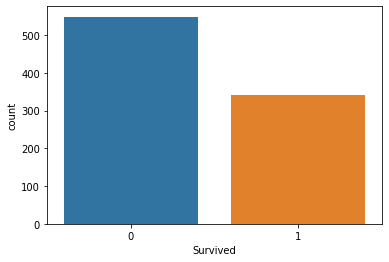

In [ ]:
sns.countplot(x="Survived", data = a)

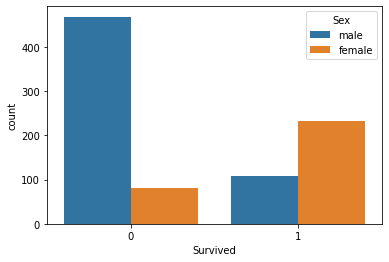

In [ ]:
sns.countplot(x="Survived", hue = "Sex", data = a)

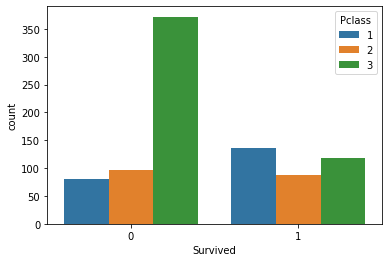

In [ ]:
sns.countplot(x="Survived", hue = "Pclass", data = a)

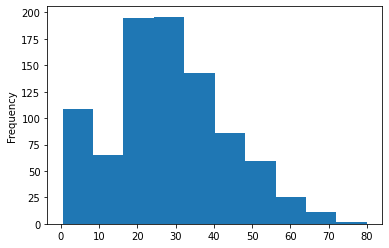

In [ ]:
a['Age'].plot.hist()

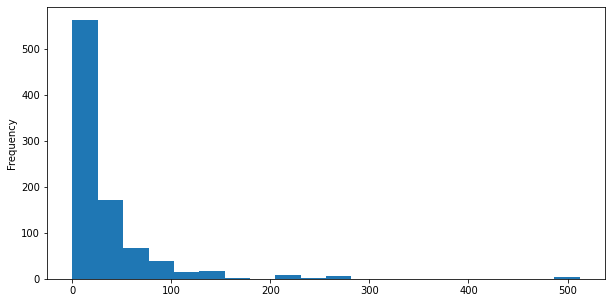

In [ ]:
a['Fare'].plot.hist(bins = 20,figsize=(10,5))

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [ ]:
a.isnull()

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
886,False,False,False,False,False,False
887,False,False,False,False,False,False
888,False,False,False,False,False,False
889,False,False,False,False,False,False


In [ ]:
a.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
dtype: int64

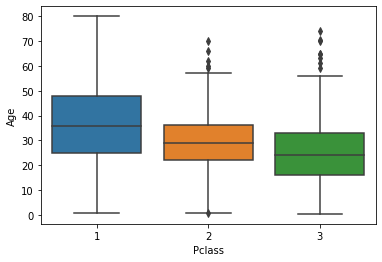

In [ ]:
sns.boxplot(x="Pclass",y="Age",data=a)

In [ ]:
a.head(2)

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833


In [47]:
sex= pd.get_dummies(a["Sex"],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [48]:
pcl = pd.get_dummies(a["Pclass"],drop_first=True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [49]:
a = pd.concat([a,sex,pcl],axis=1)
print(a)

     PassengerId  Survived  Pclass     Sex   Age     Fare  male  2  3
0              1         0       3    male  22.0   7.2500     1  0  1
1              2         1       1  female  38.0  71.2833     0  0  0
2              3         1       3  female  26.0   7.9250     0  0  1
3              4         1       1  female  35.0  53.1000     0  0  0
4              5         0       3    male  35.0   8.0500     1  0  1
..           ...       ...     ...     ...   ...      ...   ... .. ..
886          887         0       2    male  27.0  13.0000     1  1  0
887          888         1       1  female  19.0  30.0000     0  0  0
888          889         0       3  female   5.0  23.4500     0  0  1
889          890         1       1    male  26.0  30.0000     1  0  0
890          891         0       3    male  32.0   7.7500     1  0  1

[891 rows x 9 columns]


In [50]:
a.drop(['Sex','PassengerId','Pclass'], axis=1, inplace=True) 
print(a)

     Survived   Age     Fare  male  2  3
0           0  22.0   7.2500     1  0  1
1           1  38.0  71.2833     0  0  0
2           1  26.0   7.9250     0  0  1
3           1  35.0  53.1000     0  0  0
4           0  35.0   8.0500     1  0  1
..        ...   ...      ...   ... .. ..
886         0  27.0  13.0000     1  1  0
887         1  19.0  30.0000     0  0  0
888         0   5.0  23.4500     0  0  1
889         1  26.0  30.0000     1  0  0
890         0  32.0   7.7500     1  0  1

[891 rows x 6 columns]


In [51]:
X=a.drop("Survived",axis=1)  # Drop Survive column
Y=a["Survived"]

In [14]:
from sklearn.model_selection import train_test_split #Dividing data into Training and Testing 

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=1)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

      Age     Fare  male  2  3
114  17.0  14.4583     0  0  1
874  28.0  24.0000     0  1  0
76   20.0   7.8958     1  0  1
876  20.0   9.8458     1  0  1
674   5.0   0.0000     1  1  0
..    ...      ...   ... .. ..
715  19.0   7.6500     1  0  1
767  30.5   7.7500     0  0  1
72   21.0  73.5000     1  1  0
235  43.0   7.5500     0  0  1
37   21.0   8.0500     1  0  1

[623 rows x 5 columns]
      Age     Fare  male  2  3
862  48.0  25.9292     0  0  0
223  50.0   7.8958     1  0  1
84   17.0  10.5000     0  1  0
680   6.0   8.1375     0  0  1
535   7.0  26.2500     0  1  0
..    ...      ...   ... .. ..
247  24.0  14.5000     0  1  0
551  27.0  26.0000     1  1  0
239  33.0  12.2750     1  1  0
484  25.0  91.0792     1  0  0
92   46.0  61.1750     1  0  0

[268 rows x 5 columns]
114    0
874    1
76     0
876    0
674    0
      ..
715    0
767    0
72     0
235    0
37     0
Name: Survived, Length: 623, dtype: int64
862    1
223    0
84     1
680    0
535    1
      ..
247    1
551 

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
logmodel = LogisticRegression()

In [55]:
LR = logmodel.fit(X,Y)
print(LR.coef_)
print(LR.intercept_)

[[-1.64649894e-02  2.19921519e-03 -2.51145945e+00 -7.31601536e-01
  -1.85344202e+00]]
[2.57081568]


In [28]:
predictions = logmodel.predict(X_test)
print(predictions)

[1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0
 1 1 0 1 1 0 0 0 0]


In [22]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(Y_test, predictions)

array([[128,  25],
       [ 39,  76]])

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(Y_test,predictions)

0.7611940298507462